<a href="https://colab.research.google.com/github/maxenlee/Deep-Dive/blob/main/Maxen%7CFinal_Project_1_Description_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Transaction Success Prediction



This project looks at transaction data. One very important subset of performing data science on transaction data consists of binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.

The data provided has the same structure as real data typically available to solve this problem. The columns of the input variables have been anonymized, so there is no intuition available to help judge which variables might be more important, so all variables need to be considered equally.

The project should be done using the Gaussian Naive Bayes classification techniques as covered in class. In this directory is included a recommended "To Do" list for the
project.

The data is available on AWS S3 at http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv


#Business Problem:

## Analyze transaction data from the transaction table.


In [67]:
import numpy as np
import pandas as pd
#visualizations
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
#Model Fitting and featue selection
from sklearn import datasets
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Model performance comparison and analyzation

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
import scipy.stats as stats



In [68]:
model_selection.train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [69]:
url = 'http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'
df = pd.read_csv(url)


In [70]:
df.dtypes.value_counts()
# Data set looks like most of the columns are as floats. The first 3 columns seem to be identifiers of some sort
# no nulls on this first pass
# next step is to look at the elements

float64    50
int64       2
object      1
dtype: int64

In [71]:
df.head(5)
# 'IDcode' and 'Unnamed:0' columns seem to be redundent
# target is an integer
# starting from var_0, the rest of the columns seem to be similar data.
# next step is to drop the first 2 columns


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [72]:
df_cat = df[['Unnamed: 0','ID_code']].copy()
df_cat

,Unnamed: 0,ID_code
0,0,train_0
1,1,train_1
2,2,train_2
3,3,train_3
4,4,train_4
...,...,...
179995,179995,train_179995
179996,179996,train_179996
179997,179997,train_179997
179998,179998,train_179998


In [73]:
df_dropped = df.drop(columns= ['Unnamed: 0','ID_code']).copy()

df_dropped.head(4)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697


In [74]:
df_dropped.shape

(180000, 51)

In [75]:
df.shape

(180000, 53)

In [76]:
df_dropped['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

In [77]:
df_dropped['var_6'].value_counts()

 14.1195    9
 9.1917     9
 7.6825     8
 8.4792     8
 11.9928    8
           ..
-0.2354     1
 1.3187     1
 15.0074    1
 2.1708     1
 11.4228    1
Name: var_6, Length: 108599, dtype: int64

# Visualize the data

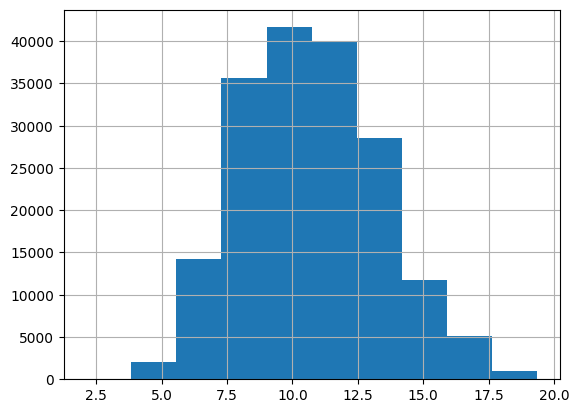

In [78]:
df_dropped['var_2'].hist();

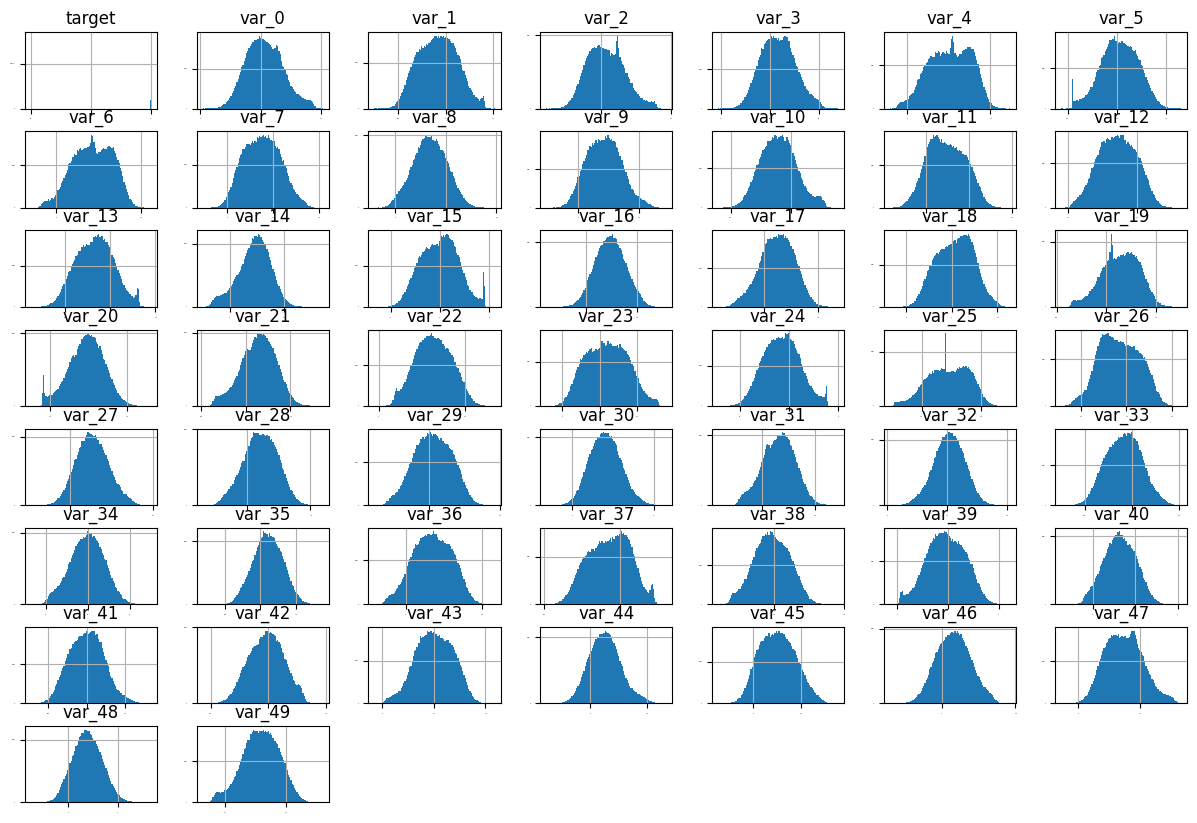

In [79]:
import matplotlib.pyplot as plt

# Generate histograms
axes = df_dropped.hist(figsize=(15,10), bins=100, xlabelsize=0,ylabelsize= 0)

# fig,subplots= plt.subplots(10,5,figsize =(15,10))
# for i,subplot in enumerate(subplots.flatten()):
#  subplot.hist(df_dropped.iloc[:,i]);

# Flatten the axes array for easy iteration
# axes = axes.flatten()


# # Iterate over each column and corresponding subplot axis
# for ax, column in zip(axes, df_dropped.columns):
#     # Calculate the mode of the current column
#     # mode() returns a Series, get the first mode with [0] since there could be multiple modes
#     spike_value = df_dropped[column].mode()[0]

#     # Add a vertical line for the mode
#     ax.axvline(x=spike_value, color='r', linestyle='--', label=f'Mode at {spike_value}')

# plt.tight_layout()  # Adjust the layout
# plt.show()


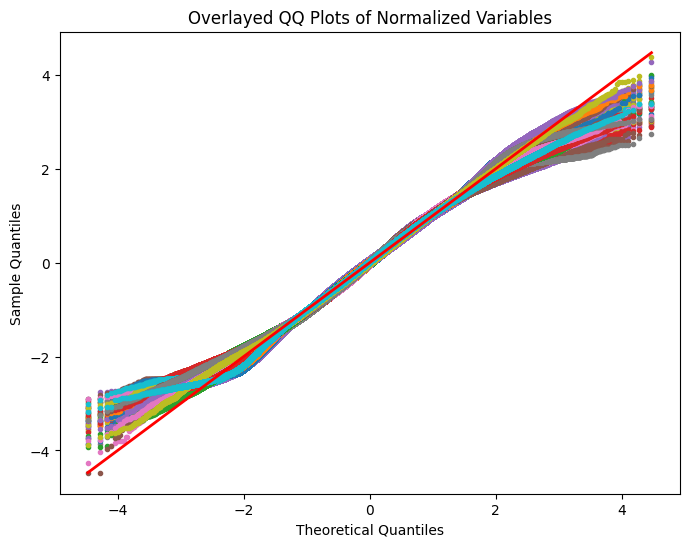

In [80]:
df_features = df_dropped.copy().drop(['target'],axis = 1)
# Normalize each column in the DataFrame
normalized_df = (df_features - df_features.mean()) / df_features.std()

# Prepare the plot
plt.figure(figsize=(8, 6))

# Generate QQ plots for each normalized variable
for column in normalized_df:
    # Generate theoretical quantiles and sample quantiles
    (osm, osr), (slope, intercept, r) = stats.probplot(normalized_df[column], dist="norm")

    # Plot the sample quantiles against the theoretical quantiles
    plt.plot(osm, osr, marker='o', linestyle='', ms=3, label=column)

# Plot the line y = x, which represents a perfect match with the normal distribution
plt.plot([np.min(osm), np.max(osm)], [np.min(osm), np.max(osm)], 'r-', lw=2)

# plt.legend()
plt.title('Overlayed QQ Plots of Normalized Variables')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


According to my initial observation. All predictor columns ('not target') seem to be normally distributed

Next i need to see if they are correlated

In [81]:
df_features.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,2.5791,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,8.5524,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,6.8202,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


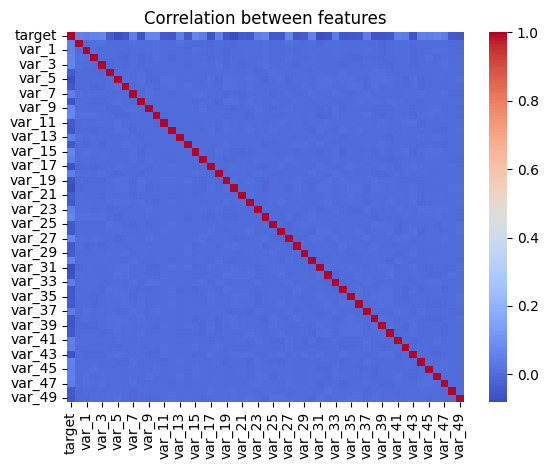

In [82]:
# df_dropped.corr()

sns.heatmap(df_dropped.corr(),annot=False,cmap = 'coolwarm')
plt.title('Correlation between features')
plt.show()


There is non statistical correlation between any features

In [83]:
df_dropped['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

In [84]:
df_1 = df_dropped.copy().loc[df_dropped['target'] == 1]
df_1.head(5)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
13,1,16.3699,1.5934,16.7395,4.8222,8.6978,13.7999,2.7925,14.3984,19.4258,...,5.6656,3.5750,-2.2723,15.7383,8.5618,11.8982,7.4002,7.4031,4.3989,15.6064
29,1,5.3301,-2.6064,13.1913,5.9064,9.1168,14.0957,12.3335,1.6610,13.0446,...,5.4183,8.6643,4.1428,4.7056,4.3694,16.4554,5.9215,7.9676,2.3405,17.4105
63,1,7.7072,0.0183,9.9974,6.0425,6.6710,14.0503,9.0144,-2.3445,23.5101,...,6.0669,2.5841,2.2445,23.1283,2.9384,27.6213,1.5832,5.0039,3.8814,15.7685
65,1,10.5358,-2.5439,8.7394,5.1584,9.0358,13.6021,4.2864,13.8723,2.2106,...,6.1149,2.2550,-7.2104,19.7545,6.3190,11.9410,4.6648,6.4227,3.4025,15.1340
71,1,6.7547,2.5973,14.2141,4.2336,9.1282,13.9394,3.6480,24.2658,33.3687,...,5.0565,11.9429,0.3140,20.4828,7.9488,11.2587,1.4677,3.5935,2.0013,18.9013


In [85]:
df_query = df_dropped.copy().query('target == 0')
df_query.shape

(161960, 51)

In [86]:
df_0 = df_dropped.loc[df_dropped['target'] == 0]
df_0.shape

(161960, 51)

In [87]:
df_dropped.shape

(180000, 51)

In [88]:
df_0['target'].value_counts()

0    161960
Name: target, dtype: int64

In [89]:
df_1['target'].value_counts()

1    18040
Name: target, dtype: int64

In [90]:
df_target = df_dropped.copy()["target"]

In [91]:
df_target.head(1)

0    0
Name: target, dtype: int64

In [92]:
df_predictors = df_dropped.copy().drop(columns= ['target'])
df_predictors.head(1)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,8.9255,-6.7863,11.9081,5.1187,5.747,14.0137,0.5745,4.284,16.2191,2.5791,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803


#Creating the model
## all of the data is normally distrubeted and not correlated.
##Using a Gaussian Naive Bayes


In [93]:
model = GaussianNB()
cv = model_selection.cross_val_score

In [94]:
# x is all of the predictors
X = df_predictors
# y is alwas the target. The Target will alwa
y = df_target

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X ,y ,random_state=420,test_size=0.25, shuffle=True)

In [95]:
from sklearn.naive_bayes import GaussianNB

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict(X_test)

print("Actual Value:", y_test)
print("Predicted Value:", predicted)

Actual Value: 89504     0
153559    0
149115    0
29884     0
37817     1
         ..
164449    0
140053    1
111209    0
57754     0
176694    1
Name: target, Length: 45000, dtype: int64
Predicted Value: [0 0 0 ... 0 0 0]


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
model.fit(X_train, y_train)

GaussianNB()

In [97]:

y_pred = model.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 36000 points : 3283


In [98]:
((y_test == y_pred).sum()/36000)*100

90.88055555555556

In [99]:
y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray*100)
print("F1 Score:", f1*100)



Accuracy: 90.88055555555556
F1 Score: 92.97541192063287


In [100]:
# Example for a regression task: Calculate Mean Squared Error

mse = mean_squared_error(y_test, y_pred)*100
print("\nMean Squared Error on Test Set:", mse,'%')



Mean Squared Error on Test Set: 9.119444444444444 %


In [101]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32378
           1       0.64      0.22      0.32      3622

    accuracy                           0.91     36000
   macro avg       0.78      0.60      0.64     36000
weighted avg       0.89      0.91      0.89     36000



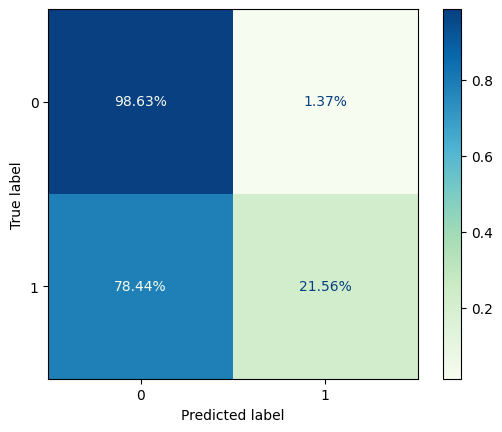

In [102]:
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    );

In [103]:
# Perform k-fold cross-validation
scores = cv(model, X, y, cv=10, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = (scores.mean())*100

print(f"Average Accuracy across {10} folds: {average_accuracy:.4f}%")

Average Accuracy across 10 folds: 91.1217%


#Merging the Data together for an equal dataset.

In [104]:
df_0.shape

(161960, 51)

In [105]:
minority_count = 18040
total_count = 18040 + 161960

proportion_minority = minority_count / total_count
print(proportion_minority)
percentage_minority = proportion_minority * 100
print(f"{percentage_minority}%")

0.10022222222222223
10.022222222222222%


In [106]:
df_0['target'].value_counts()

0    161960
Name: target, dtype: int64

In [107]:
trimmed_filter = df_1.shape[0]
trimmed_filter

18040

In [108]:
df_1.shape

(18040, 51)

In [109]:
df_00 = df_0.sample(trimmed_filter)
df_00.shape

(18040, 51)

In [110]:
df_equal  =  pd.concat([df_1.copy(),df_00.copy()])
df_equal.shape

(36080, 51)

In [111]:
df_equal['target'].value_counts()

1    18040
0    18040
Name: target, dtype: int64

In [112]:
# x is all of the predictors
X = df_equal.copy().drop(columns = ['target'])
# y is always the target. I believe that the target will always be a single value.
y = df_equal['target']


In [113]:

y.shape

(36080,)

In [114]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X ,y ,random_state=420,test_size=0.25, shuffle=True)

In [115]:
from sklearn.naive_bayes import GaussianNB

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)

print("Actual Value:", y_test)
print("Predicted Value:", predicted)

Actual Value: 43439     1
87161     0
126749    1
66206     0
156838    1
         ..
29359     0
168623    0
113244    1
132658    1
164165    1
Name: target, Length: 9020, dtype: int64
Predicted Value: [0 0 0 ... 0 0 0]


In [116]:
# Example for a regression task: Calculate Mean Squared Error

mse = mean_squared_error(y_test, y_pred)*100
print("\nMean Squared Error on Test Set:", mse,'%')



Mean Squared Error on Test Set: 24.57871396895787 %


In [117]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      4505
           1       0.76      0.74      0.75      4515

    accuracy                           0.75      9020
   macro avg       0.75      0.75      0.75      9020
weighted avg       0.75      0.75      0.75      9020



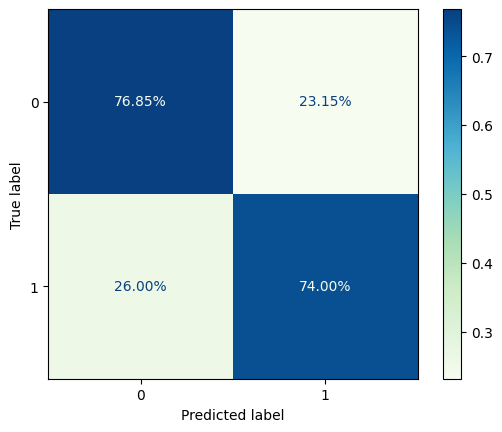

In [118]:
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    );

In [119]:
# Perform k-fold cross-validation
scores = cv(model, X, y, cv=10, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = (scores.mean())*100

print(f"Average Accuracy across {5} folds: {average_accuracy:.4f}%")

Average Accuracy across 5 folds: 75.7400%



Mean Squared Error on Test Set: 24.57871396895787 %

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      4505
           1       0.76      0.74      0.75      4515

    accuracy                           0.75      9020
   macro avg       0.75      0.75      0.75      9020
weighted avg       0.75      0.75      0.75      9020

Average Accuracy across 10 folds: 75.7400%


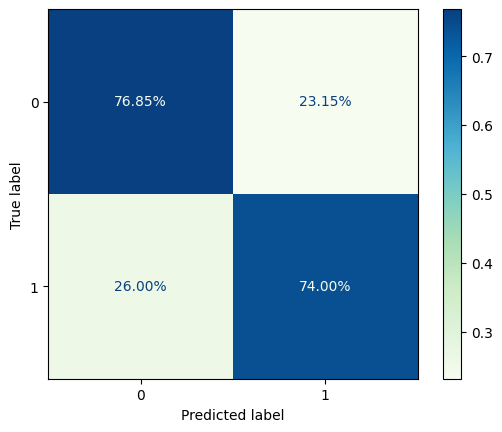

In [120]:
# x is all of the predictors
X = df_equal.copy().drop(columns = ['target'])
# y is always the target. I believe that the target will always be a single value.
y = df_equal['target']

##---------------------------------------------------------
# using the train test split function with X_standardized
X_train, X_test, y_train, y_test = train_test_split(X ,y ,random_state=420,test_size=0.25, shuffle=True)

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)

# print("Actual Value:", y_test)
# print("Predicted Value:", predicted)
# Example for a regression task: Calculate Mean Squared Error

mse = mean_squared_error(y_test, y_pred)*100
print("\nMean Squared Error on Test Set:", mse,'%')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    );

# Perform k-fold cross-validation
scores = cv(model, X, y, cv=10, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = (scores.mean())*100

print(f"Average Accuracy across {10} folds: {average_accuracy:.4f}%")

#Normalization
I want to try to normalize X to see if it optimizes the MSE and the confidence score.



In [121]:
# x is all of the predictors
X = df_equal.copy().drop(columns = ['target'])
# y is always the target. I believe that the target will always be a single value.
y = df_equal['target']


In [122]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Z-Score Normalization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Min-Max Scaling
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_min_max_scaled = min_max_scaler.fit_transform(X)


First the Z-Score


Mean Squared Error on Test Set: 24.57871396895787 %

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      4505
           1       0.76      0.74      0.75      4515

    accuracy                           0.75      9020
   macro avg       0.75      0.75      0.75      9020
weighted avg       0.75      0.75      0.75      9020

Average Accuracy across 10 folds: 75.7400%


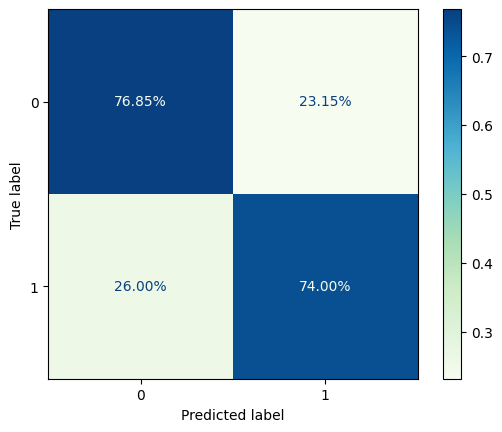

In [123]:
# using the train test split function with X_standardized
X_train, X_test, y_train, y_test = train_test_split(X_standardized ,y ,random_state=420,test_size=0.25, shuffle=True)

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)

# print("Actual Value:", y_test)
# print("Predicted Value:", predicted)
# Example for a regression task: Calculate Mean Squared Error

mse = mean_squared_error(y_test, y_pred)*100
print("\nMean Squared Error on Test Set:", mse,'%')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    );

# Perform k-fold cross-validation
scores = cv(model, X, y, cv=10, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = (scores.mean())*100

print(f"Average Accuracy across {10} folds: {average_accuracy:.4f}%")

Next the min-max scale

Actual Value: 43439     1
87161     0
126749    1
66206     0
156838    1
         ..
29359     0
168623    0
113244    1
132658    1
164165    1
Name: target, Length: 9020, dtype: int64
Predicted Value: [0 0 0 ... 0 0 0]

Mean Squared Error on Test Set: 24.57871396895787 %

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      4505
           1       0.76      0.74      0.75      4515

    accuracy                           0.75      9020
   macro avg       0.75      0.75      0.75      9020
weighted avg       0.75      0.75      0.75      9020

Average Accuracy across 10 folds: 75.7400%


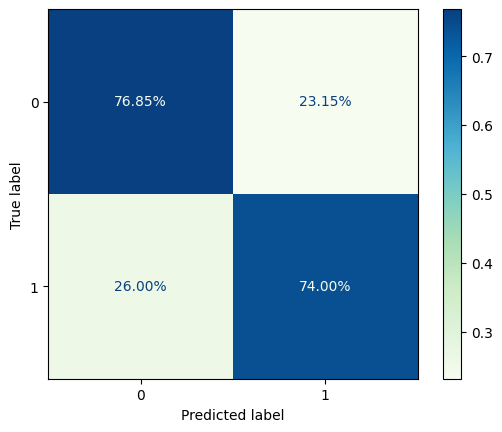

In [124]:
# using the train test split function X_min_max_scaled
X_train, X_test, y_train, y_test = train_test_split(X_min_max_scaled ,y ,random_state=420,test_size=0.25, shuffle=True)

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)

print("Actual Value:", y_test)
print("Predicted Value:", predicted)
# Example for a regression task: Calculate Mean Squared Error

mse = mean_squared_error(y_test, y_pred)*100
print("\nMean Squared Error on Test Set:", mse,'%')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    );

# Perform k-fold cross-validation
scores = cv(model, X, y, cv=10, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = (scores.mean())*100

print(f"Average Accuracy across {10} folds: {average_accuracy:.4f}%")

## No signifcant change from the standard balaced set
Showing the comparison balanced set below
then the biased set


The number of times the model predicted the real target: 
 --  5432 out of 7216 points --

Mean Squared Error on Test Set: 24.722838137472284 %

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      3603
           1       0.76      0.74      0.75      3613

    accuracy                           0.75      7216
   macro avg       0.75      0.75      0.75      7216
weighted avg       0.75      0.75      0.75      7216

Average Accuracy across 10 folds: 75.7400%


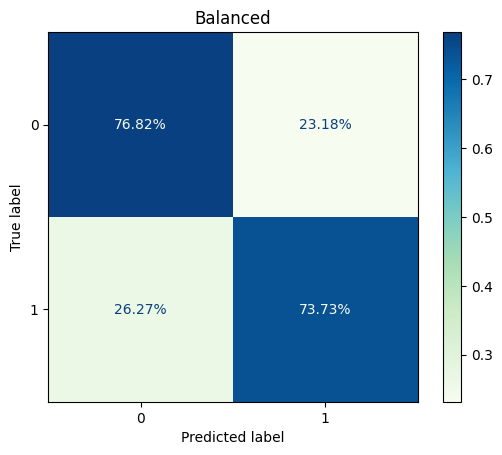

In [125]:
# x is all of the predictors
X = df_equal.copy().drop(columns = ['target'])
# y is always the target. I believe that the target will always be a single value.
y = df_equal['target']

# using the train test split function with X_standardized
X_train, X_test, y_train, y_test = train_test_split(X ,y ,random_state=420,test_size=0.2, shuffle=True)

# variance smoothing
model = GaussianNB(var_smoothing=1e-9)
# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)

# print("Actual Value:", y_test-predicted)
# print("Predicted Value:", predicted)

# Comparing the matches between the predictions from the model compared to the real target
print("The number of times the model predicted the real target: \n --  %d out of %d points --"
      % ((y_test == y_pred).sum(),X_test.shape[0]))

# Example for a regression task: Calculate Mean Squared Error

mse = mean_squared_error(y_test, y_pred)*100
print("\nMean Squared Error on Test Set:", mse,'%')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu'
    );

plt.title('Balanced')
# Perform k-fold cross-validation
scores = cv(model, X, y, cv=10, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = (scores.mean())*100

print(f"Average Accuracy across {10} folds: {average_accuracy:.4f}%")

Then the Biased

The number of times the model predicted the real target: 
 --  40944 out of 45000 points. --

Mean Squared Error on Test Set: 9.013333333333334 %

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     40461
           1       0.66      0.22      0.33      4539

    accuracy                           0.91     45000
   macro avg       0.79      0.60      0.64     45000
weighted avg       0.89      0.91      0.89     45000

Average Accuracy across 10 folds: 91.1217%


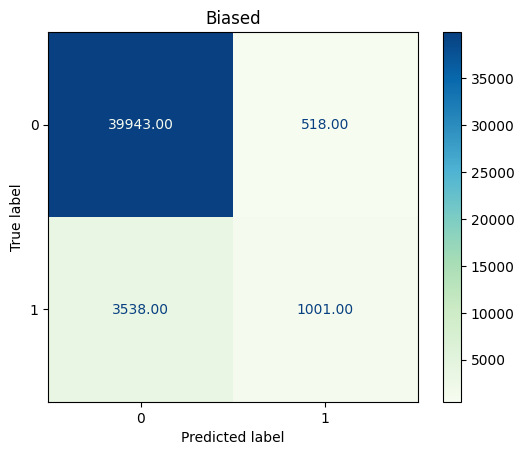

In [130]:
# x is all of the predictors
X = df_predictors
# y is alwas the target. The Target will alwa
y = df_target

# using the train test split function with X_standardized
X_train, X_test, y_train, y_test = train_test_split(X ,y ,random_state=420,test_size=0.25, shuffle=True)

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)

# print("Actual Value:", y_test-predicted)
# print("Predicted Value:", predicted)

# Comparing the matches between the predictions from the model compared to the real target
print("The number of times the model predicted the real target: \n --  %d out of %d points. --"
      % ((y_test == y_pred).sum(),X_test.shape[0]))

# Example for a regression task: Calculate Mean Squared Error

mse = mean_squared_error(y_test, y_pred)*100
print("\nMean Squared Error on Test Set:", mse,'%')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    # normalize = 'true',
    values_format = '.2f',
    cmap = 'GnBu'
    );

plt.title('Biased')

# Perform k-fold cross-validation
scores = cv(model, X, y, cv=10, scoring='accuracy',)

# Calculate the average accuracy
average_accuracy = (scores.mean())*100

print(f"Average Accuracy across {10} folds: {average_accuracy:.4f}%")

#Final assumption

With the Gaussian model we can assume different accuracies depending on the data we train the model with. With a biased data set we can more accuratley predict targets that are represented more than the other, but at the cost of falsely pedicting a target. When the targets are balanced in the training data, the ability for a model to discern between the ideal states of the target increases is equalized as well. While also reducing the models capacity to falsely predict a target.

If the business case prioritizes accuracy over error then a biased set may be viable.
Otherwise, if the business case can tolerate a drop in accuracy then the amout of false predictions will be drastically reduced

In [127]:
df_equal['target'].value_counts()

1    18040
0    18040
Name: target, dtype: int64

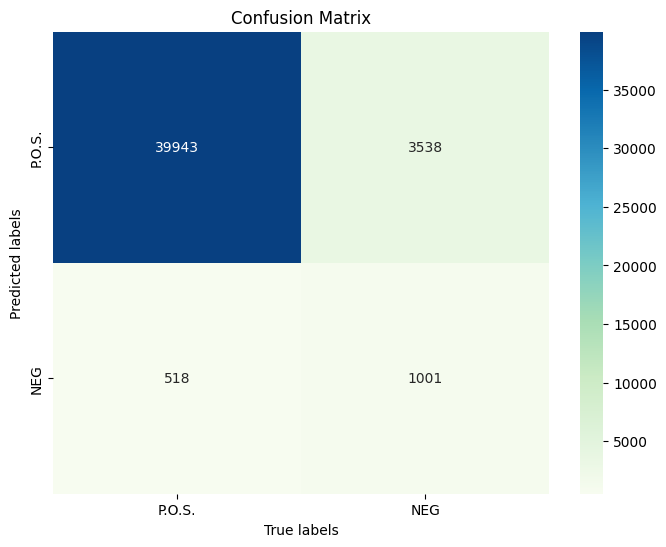

In [136]:

# Compute the confusion matrix
cm = confusion_matrix(y_pred,y_test)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, ax=ax, cmap='GnBu', fmt='g')  # 'g' for generic number format

# Labels, title, and ticks
label_names = ['P.O.S.', 'NEG']  # Adjust these based on your actual labels/classes
ax.set_ylabel('Predicted labels')
ax.set_xlabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label_names)
ax.yaxis.set_ticklabels(label_names)
plt.show()
